# Cats VS Dogs Classification using CNN

## Loading Dataset
We download our dataset from kaggle (<a href="https://www.kaggle.com/datasets/salader/dogs-vs-cats" target="_blank">Cats vs Dogs Classification Dataset</a>). The download will be a zipfile. Move or copy the zipfile to the folder of the notebook. Unzipping will be done by the following code.<br> Note: If cloning the github repository, the zip file is not present in it. So download is necessary.

Now that the dataset is downloaded, we extract the data by unzipping the files.

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


### 1.Importing Necessary Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import cv2

Now, here we are using generators. Generators divide the datset into smaller batches and the load each batch at a time to the ram for processing. This is a very useful attribute of keras, which is essential for handling large dataset.

### 2. Creating Generators for Data Loading

In [5]:
#Generator for our images dataset.
train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', #This assigns 0 to cats and 1 to dogs
    batch_size = 64,
    image_size = (256,256)
)

test_df = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', #This assigns 0 to cats and 1 to dogs
    batch_size = 64,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


This stores the data in the form of numpy array with values ranging from 0-255. However, we need it in the range of 0-1. Hence, we normalize the same.

### 3.Normalizing

In [6]:
# Normalization
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)


### 4.CNN Model
<br>
This CNN Model consists for 3 convolutional layers.
<br> First Layer consists of 32 filters
<br> Second Layer - 64 filters
<br> Third Layer - 128 filters

In [7]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      58,982,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,388,289 (226.55 MB)

 Trainable params: 59,387,393 (226.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(train_df,epochs=50,validation_data=test_df)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile Model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_df, epochs=100, validation_data=test_df,
                    callbacks=[lr_scheduler, early_stopping])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 377ms/step - accuracy: 0.5427 - loss: 7.9420 - val_accuracy: 0.5706 - val_loss: 0.6849 - learning_rate: 0.0010
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 307ms/step - accuracy: 0.5835 - loss: 0.7142 - val_accuracy: 0.5644 - val_loss: 0.6708 - learning_rate: 0.0010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 307ms/step - accuracy: 0.6212 - loss: 0.6665 - val_accuracy: 0.6788 - val_loss: 0.6235 - learning_rate: 0.0010
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 315ms/step - accuracy: 0.6610 - loss: 0.6094 - val_accuracy: 0.6704 - val_loss: 0.5763 - learning_rate: 0.0010
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 303ms/step - accuracy: 0.7036 - loss: 0.5816 - val_accuracy: 0.7314 - val_loss: 0.5482 - learning_rate: 0.0010
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 306ms/step - accuracy: 0.7349 - loss: 0.5406 - val_accuracy: 0.5958 - val_loss: 0.7792 - learning_rate: 0.0010
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 96s 307ms/step - accu

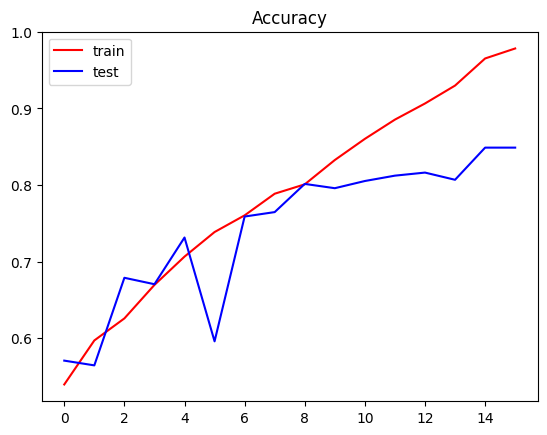

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.title("Accuracy")
plt.show()

So, even though we are getting high accuracy for the training set, for the test set we are getting around ~83% accuracy. Which is somewhat decent.

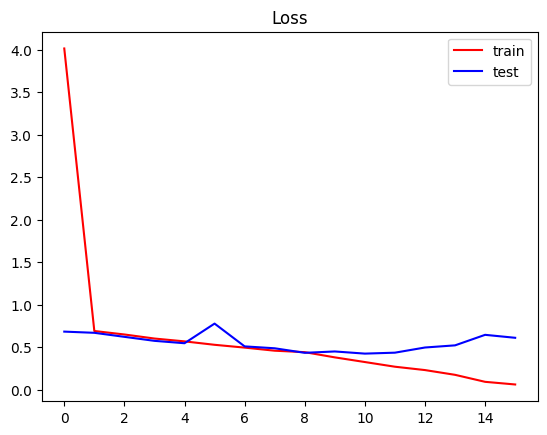

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.title("Loss")
plt.show()

So, from the above two graphs, we can see that the model is overfitting. It gives good accuracy and low losses for the training set, but shows higher losses and declining accuracy for test set.

### 5. Testing on External Images
<br> We downloaded 2 images to test our model. <br>Cat -> 0 <br>Dog -> 1

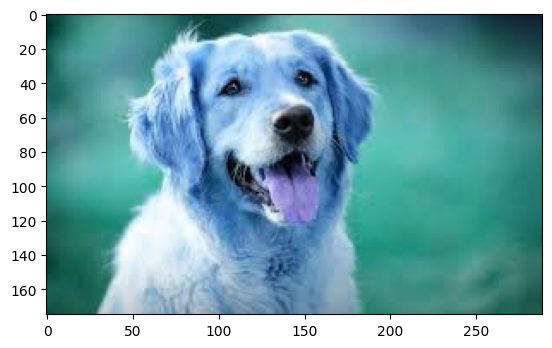

In [11]:
test_image=cv2.imread('/content/dog.jpg')
plt.imshow(test_image)
plt.show()

In [12]:
test_image=cv2.resize(test_image,(256,256))
test_input=test_image.reshape((1,256,256,3))
pred = model.predict(test_input)
pred = pred > 0.5
if pred == 1:
  print("Picture is of a Dog")
else:
  print("Picture is of a Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Picture is of a Dog


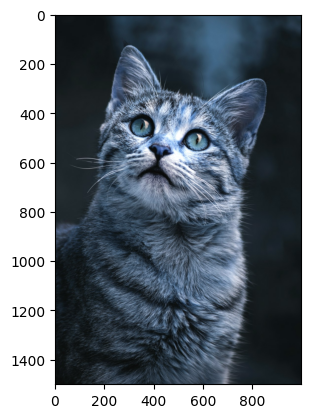

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Picture is of a Cat


In [13]:
test_image=cv2.imread('/content/cat.jpg')
plt.imshow(test_image)
plt.show()
test_image=cv2.resize(test_image,(256,256))
test_input=test_image.reshape((1,256,256,3))
pred = model.predict(test_input)
pred = pred > 0.5
if pred == 1:
  print("Picture is of a Dog")
else:
  print("Picture is of a Cat")

### 6. Saving the Model

In [15]:
tf.saved_model.save(model,".")

With this, we have saved our trained model. This will be utilized by the streamlit app for deployment.

***

### Authors
<a href="https://www.linkedin.com/in/kinjal-mitra-992147325/" target="_blank">Kinjal Mitra</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | 
| ----------------- | ------- | ---------- | 
| 2025-03-26        | 1.0     | Kinjal Mitra |